# Guided Projects Artificial Intelligence & Machine Learning
## Guided Projects: Feature Engineering
### Face Feature Extraction
The face recognition system consists of a feature extraction step and a classification step. 
Principal component analysis (PCA) is widely used in such scenarios to construct the feature 
space and extract features, substantially reducing the dimensionality of the input feature 
vector/image. The reduced feature vector can then be used for the purpose of face analysis.
### Question:
Using PCA create a face recognition system that gives access to only certain people. To 
implement this, you can use LFW_peoples dataset provided in the scikit-learn library.
Given this dataset, use only those classes that have a minimum (use
min_faces_per_person = 70, resize = 0.4 ) 70 images (should give you only 
11 classes). Given this subset of images, apply PA to obtain the corresponding eigen face 
for each class. You can additionally train a classifier for recognition purpose.

In [1]:
# Import libraries
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from sklearn.datasets import fetch_lfw_people
from sklearn.model_selection import train_test_split
from sklearn.metrics import classification_report
from sklearn.decomposition import PCA
from sklearn.neural_network import MLPClassifier

In [2]:
# Importing the dataset
dataset = fetch_lfw_people(min_faces_per_person = 70, resize = 0.4)
x = dataset.data
y = dataset.target
target_names = dataset.target_names
images = dataset.images

In [3]:
# Print the shape of the data
print('Shape of features is: {}'.format(x.shape))
print('Shape of targets is: {}'.format(y.shape))
print('Shape of target_names is: {}'.format(target_names.shape))
print('Shape of images is: {}'.format(images.shape))

Shape of features is: (1217, 1850)
Shape of targets is: (1217,)
Shape of target_names is: (6,)
Shape of images is: (1217, 50, 37)


In [4]:
n, h, w = images.shape
print('length: {}'.format(n))
print('breadth: {}'.format(h))
print('width: {}'.format(w))

length: 1217
breadth: 50
width: 37


In [5]:
# Check the distribution of the dataset
a, b = np.unique(y, return_counts = True)
print(pd.DataFrame(b, a))

     0
0   77
1  236
2  121
3  530
4  109
5  144


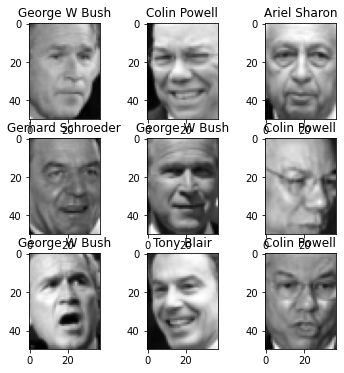

In [6]:
# Plot function to plot the images
def plt_image(images, titles, h, w, rows = 3, cols = 3):
    plt.figure(figsize = (2*cols, 2*rows))
    for i in range(rows*cols):
        plt.subplot(rows, cols, i+1)
        plt.imshow(images[i].reshape(h, w), cmap = 'gray')
        plt.title(target_names[titles[i]])
plt_image(x, y, h, w)

In [7]:
x_train, x_test, y_train, y_test = train_test_split(x, y, test_size = 0.25)

In [8]:
x_train.shape, x_test.shape, y_train.shape, y_test.shape

((912, 1850), (305, 1850), (912,), (305,))

In [9]:
p1 = PCA(n_components = 500)
p1.fit(x_train)

PCA(n_components=500)

In [10]:
x_train_trans1 = p1.transform(x_train)
x_test_trans1 = p1.transform(x_test)
x_train_trans1.shape, x_test_trans1.shape

((912, 500), (305, 500))

In [11]:
model = MLPClassifier(hidden_layer_sizes = (1024, ), batch_size = 128, verbose = True, early_stopping = True)
model.fit(x_train_trans1, y_train)

Iteration 1, loss = 16.84588403
Validation score: 0.619565
Iteration 2, loss = 2.70456446
Validation score: 0.706522
Iteration 3, loss = 0.85387252
Validation score: 0.782609
Iteration 4, loss = 0.30325541
Validation score: 0.815217
Iteration 5, loss = 0.00140283
Validation score: 0.793478
Iteration 6, loss = 0.03012393
Validation score: 0.815217
Iteration 7, loss = 0.00035242
Validation score: 0.804348
Iteration 8, loss = 0.00032531
Validation score: 0.804348
Iteration 9, loss = 0.00035501
Validation score: 0.804348
Iteration 10, loss = 0.00033930
Validation score: 0.804348
Iteration 11, loss = 0.00031109
Validation score: 0.804348
Iteration 12, loss = 0.00030315
Validation score: 0.804348
Iteration 13, loss = 0.00030162
Validation score: 0.804348
Iteration 14, loss = 0.00030143
Validation score: 0.804348
Iteration 15, loss = 0.00030131
Validation score: 0.804348
Validation score did not improve more than tol=0.000100 for 10 consecutive epochs. Stopping.


MLPClassifier(batch_size=128, early_stopping=True, hidden_layer_sizes=(1024,),
              verbose=True)

In [12]:
y_pred = model.predict(x_test_trans1)
print(classification_report(y_test, y_pred, target_names = target_names))

                   precision    recall  f1-score   support

     Ariel Sharon       0.86      0.67      0.75        18
     Colin Powell       0.74      0.82      0.78        62
  Donald Rumsfeld       0.70      0.72      0.71        29
    George W Bush       0.86      0.83      0.84       122
Gerhard Schroeder       0.75      0.77      0.76        31
       Tony Blair       0.76      0.74      0.75        43

         accuracy                           0.79       305
        macro avg       0.78      0.76      0.77       305
     weighted avg       0.79      0.79      0.79       305



In [13]:
p = PCA()
p.fit(x_train)

PCA()

In [14]:
p.transform(x_train).shape

(912, 912)

In [15]:
var = p.explained_variance_
print('Variance: {}'.format(var.shape))
com = p.components_
print('Components: {}'.format(com.shape))

Variance: (912,)
Components: (912, 1850)


In [16]:
val_sum = np.sum(p.explained_variance_)
print(val_sum)
sort_ind = np.argsort(var)
sort_ind = sort_ind[::-1]
print(sort_ind.shape)

2572118.8
(912,)


In [17]:
temp_sum = 0
principal_vec = []
principal_val = []
i=0
while(temp_sum<0.98*val_sum):
    principal_vec.append(com[sort_ind[i],:])
    principal_val.append(var[sort_ind[i]])
    temp_sum += var[sort_ind[i]]
    i += 1
print('Number of Principal Components are: {}'.format(i))

Number of Principal Components are: 236


In [18]:
principal_vec = np.matrix(principal_vec)
print(principal_vec.shape)

(236, 1850)


In [19]:
x_train_trans = np.dot(x_train, principal_vec.T)
x_test_trans = np.dot(x_test, principal_vec.T)
x_train_trans.shape, x_test_trans.shape

((912, 236), (305, 236))

In [20]:
model_clf = MLPClassifier(hidden_layer_sizes = (1024, ), batch_size = 128, verbose = True, early_stopping = True)
model_clf.fit(x_train_trans, y_train)

Iteration 1, loss = 23.44877314
Validation score: 0.434783
Iteration 2, loss = 15.35122852
Validation score: 0.521739
Iteration 3, loss = 10.69941488
Validation score: 0.684783
Iteration 4, loss = 5.59196681
Validation score: 0.750000
Iteration 5, loss = 3.58427266
Validation score: 0.728261
Iteration 6, loss = 1.75296313
Validation score: 0.782609
Iteration 7, loss = 1.15574063
Validation score: 0.804348
Iteration 8, loss = 0.54073558
Validation score: 0.771739
Iteration 9, loss = 0.18274975
Validation score: 0.760870
Iteration 10, loss = 0.15081070
Validation score: 0.771739
Iteration 11, loss = 0.07121953
Validation score: 0.771739
Iteration 12, loss = 0.01992069
Validation score: 0.760870
Iteration 13, loss = 0.00014361
Validation score: 0.782609
Iteration 14, loss = 0.00014566
Validation score: 0.782609
Iteration 15, loss = 0.00016005
Validation score: 0.782609
Iteration 16, loss = 0.00016141
Validation score: 0.782609
Iteration 17, loss = 0.00014038
Validation score: 0.782609
Ite

MLPClassifier(batch_size=128, early_stopping=True, hidden_layer_sizes=(1024,),
              verbose=True)

In [21]:
y_pred_clf = model_clf.predict(x_test_trans)
print(classification_report(y_test, y_pred_clf, target_names = target_names))

                   precision    recall  f1-score   support

     Ariel Sharon       0.92      0.61      0.73        18
     Colin Powell       0.85      0.82      0.84        62
  Donald Rumsfeld       0.64      0.86      0.74        29
    George W Bush       0.93      0.81      0.86       122
Gerhard Schroeder       0.52      0.87      0.65        31
       Tony Blair       0.91      0.74      0.82        43

         accuracy                           0.80       305
        macro avg       0.79      0.79      0.77       305
     weighted avg       0.84      0.80      0.81       305



In [22]:
# Check the distribution of the dataset
a, b = np.unique(y, return_counts = True)
print(pd.DataFrame(b, a))

     0
0   77
1  236
2  121
3  530
4  109
5  144


In [23]:
# Plot function to plot the images
def plt_image_2(images, titles, h, w, rows = 3, cols = 3):
    plt.figure(figsize = (2*cols, 2*rows))
    for i in range(rows*cols):
        plt.subplot(rows, cols, i+1)
        plt.imshow(images[i].reshape(h, w), cmap = 'gray')
        plt.title(titles[i])

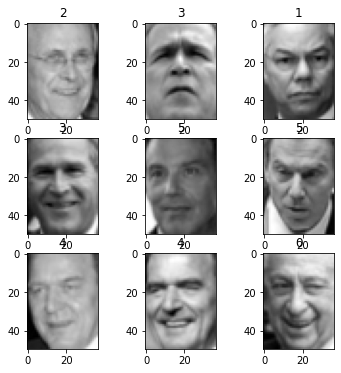

In [24]:
plt_image_2(x_test, y_test, h, w)

In [25]:
n_components = 236
mean_img = []
for i in range(n_components):
    v = principal_vec[i,:]
    img = v.reshape((h, w))
    mean_img.append(img)
mean_img = np.array(mean_img)
print(mean_img.shape)

(236, 50, 37)


In [28]:
pca_tiles = [f"eigenvector-{i}" for i in range(n_components)]

236

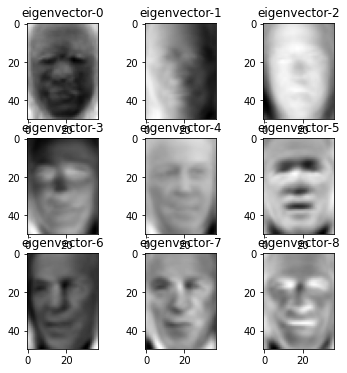

In [31]:
plt_image_2(mean_img, pca_tiles, h, w)
len(mean_img)